In [1]:
! pip install folium

  Using cached folium-0.11.0-py2.py3-none-any.whl (93 kB)
  Using cached branca-0.4.1-py3-none-any.whl (24 kB)


https://python-visualization.github.io/folium/quickstart.html#Getting-Started

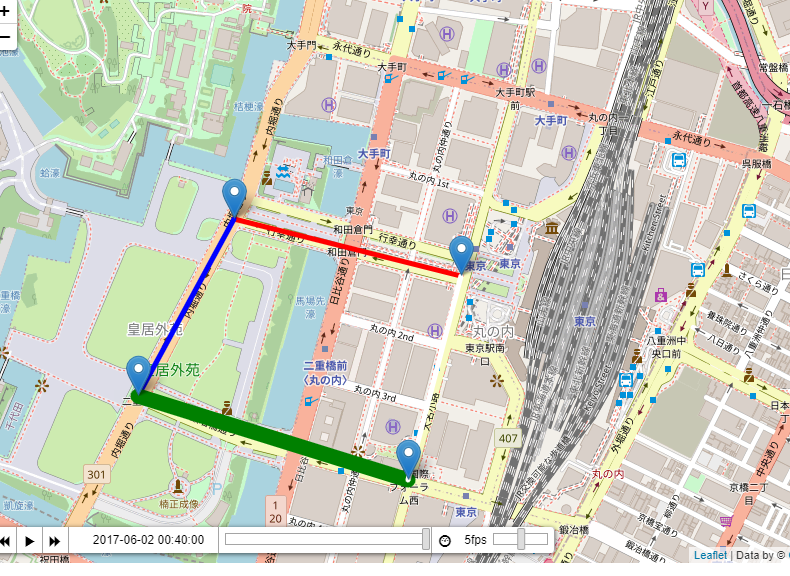

In [9]:
m = folium.Map(
    location=[35.68159659061569, 139.76451516151428],
    zoom_start=16
)

# Lon, Lat order.
lines = [
    {
        'coordinates': [
            [139.76451516151428, 35.68159659061569],
            [139.75964426994324, 35.682590062684206],
        ],
        'dates': [
            '2017-06-02T00:00:00',
            '2017-06-02T00:10:00'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [139.75964426994324, 35.682590062684206],
            [139.7575843334198, 35.679505030038506],
        ],
        'dates': [
            '2017-06-02T00:10:00',
            '2017-06-02T00:20:00'
        ],
        'color': 'blue'
    },
    {
        'coordinates': [
            [139.7575843334198, 35.679505030038506],
            [139.76337790489197, 35.678040905014065],
        ],
        'dates': [
            '2017-06-02T00:20:00',
            '2017-06-02T00:30:00'
        ],
        'color': 'green',
        'weight': 15,
    },
    {
        'coordinates': [
            [139.76337790489197, 35.678040905014065],
            [139.76451516151428, 35.68159659061569],
        ],
        'dates': [
            '2017-06-02T00:30:00',
            '2017-06-02T00:40:00'
        ],
        'color': '#FFFFFF',
    },
]

features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],
        },
        'properties': {
            'times': line['dates'],
            'style': {
                'color': line['color'],
                'weight': line['weight'] if 'weight' in line else 5
            }
        }
    }
    for line in lines
]

plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT1M', add_last_point=True).add_to(m)

m.save(os.path.join('results', 'Plugins_6.html'))
m

FileNotFoundError: [Errno 2] No such file or directory: 'results\\Plugins_6.html'

https://www.kaggle.com/poonaml/last-cab-to-new-york-animated-heatmap-trips-folium



In [1]:
import os

import numpy as np
import pandas as pd
import folium
from folium import plugins

print(folium.__version__)

0.11.0


In [2]:
LaGuardia = {
    "minLat": 36.8,
    "maxLat": 37.8,
    "minLong": 127.8,
    "maxLong": 126.8
}

In [3]:
#bring in the 6 packs
train=pd.read_csv("C:/Users/GDLSYSTEM/2890/df_0531_stpye.csv")#../input/nyc-taxi-trip-duration/
df = pd.read_csv("C:/Users/GDLSYSTEM/2890/df_0531_stpye.csv")
df.drop(['Unnamed: 0','SHIP_ID','stype','TRGT_SENSOR_KIND','MSG_ID','LOC_ACCRCY','Length','Beam','ShipName','AREA_ID','SOG_VAL'], axis='columns', inplace=True)
train.drop(['Unnamed: 0', 'TRGT_SENSOR_KIND','MSG_ID','LOC_ACCRCY','Length','Beam'], axis='columns', inplace=True)
train.head(3)

,stype,SHIP_ID,RECV_DT,LON_VAL,LAT_VAL,ShipName,AREA_ID,SOG_VAL
0,unknown,440004750,2019-05-01 00:00:17,126.856128,36.942370,KYONGGI308,4403714.0,0.0
1,unknown,440004750,2019-05-01 00:00:27,126.856135,36.942358,KYONGGI308,4403203.0,0.0
2,unknown,440004750,2019-05-01 00:00:38,126.856133,36.942337,KYONGGI308,4403004.0,0.0


In [4]:
df = df.drop([0])
train = train.drop([266076])
df = df.reset_index(drop=False,inplace=False)

In [5]:
#train['RECV_DT2'] = (df['RECV_DT'],ignore_index = True)
train = pd.merge(train, df,left_index=True, right_index=True, how='left')
train.drop(['index'], axis='columns', inplace=True)
train.head(5)

,stype,SHIP_ID,RECV_DT_x,LON_VAL_x,LAT_VAL_x,ShipName,AREA_ID,SOG_VAL,RECV_DT_y,LON_VAL_y,LAT_VAL_y
0,unknown,440004750,2019-05-01 00:00:17,126.856128,36.942370,KYONGGI308,4403714.0,0.0,2019-05-01 00:00:27,126.856135,36.942358
1,unknown,440004750,2019-05-01 00:00:27,126.856135,36.942358,KYONGGI308,4403203.0,0.0,2019-05-01 00:00:38,126.856133,36.942337
2,unknown,440004750,2019-05-01 00:00:38,126.856133,36.942337,KYONGGI308,4403004.0,0.0,2019-05-01 00:00:58,126.856117,36.942365
3,unknown,440004750,2019-05-01 00:00:58,126.856117,36.942365,KYONGGI308,4403203.0,0.0,2019-05-01 00:01:08,126.856115,36.942365
4,unknown,440004750,2019-05-01 00:01:08,126.856115,36.942365,KYONGGI308,4403714.0,0.0,2019-05-01 00:01:17,126.856113,36.942367


In [6]:
train['y'] = pd.to_datetime(train.RECV_DT_y)
train['x'] = pd.to_datetime(train.RECV_DT_x)
train['y'] = train['y'].dt.second
train['x'] = train['x'].dt.second
train['trip_duration'] = (train.y-train.x)
#train['RECV_DT_x'] = pd.to_datetime(train.RECV_DT_x)
#train['RECV_DT_y'] = pd.to_datetime(train.RECV_DT_y)
train['trip_duration'] = train['trip_duration'].astype(float)
train.head(5)

,stype,SHIP_ID,RECV_DT_x,LON_VAL_x,LAT_VAL_x,ShipName,AREA_ID,SOG_VAL,RECV_DT_y,LON_VAL_y,LAT_VAL_y,y,x,trip_duration
0,unknown,440004750,2019-05-01 00:00:17,126.856128,36.942370,KYONGGI308,4403714.0,0.0,2019-05-01 00:00:27,126.856135,36.942358,27,17,10.0
1,unknown,440004750,2019-05-01 00:00:27,126.856135,36.942358,KYONGGI308,4403203.0,0.0,2019-05-01 00:00:38,126.856133,36.942337,38,27,11.0
2,unknown,440004750,2019-05-01 00:00:38,126.856133,36.942337,KYONGGI308,4403004.0,0.0,2019-05-01 00:00:58,126.856117,36.942365,58,38,20.0
3,unknown,440004750,2019-05-01 00:00:58,126.856117,36.942365,KYONGGI308,4403203.0,0.0,2019-05-01 00:01:08,126.856115,36.942365,8,58,-50.0
4,unknown,440004750,2019-05-01 00:01:08,126.856115,36.942365,KYONGGI308,4403714.0,0.0,2019-05-01 00:01:17,126.856113,36.942367,17,8,9.0


In [7]:
g = train.trip_duration[train['trip_duration']<=0].index

In [8]:
train.iloc[g,-1] = train['trip_duration'] + 60

In [9]:
train.head(5)

,stype,SHIP_ID,RECV_DT_x,LON_VAL_x,LAT_VAL_x,ShipName,AREA_ID,SOG_VAL,RECV_DT_y,LON_VAL_y,LAT_VAL_y,y,x,trip_duration
0,unknown,440004750,2019-05-01 00:00:17,126.856128,36.942370,KYONGGI308,4403714.0,0.0,2019-05-01 00:00:27,126.856135,36.942358,27,17,10.0
1,unknown,440004750,2019-05-01 00:00:27,126.856135,36.942358,KYONGGI308,4403203.0,0.0,2019-05-01 00:00:38,126.856133,36.942337,38,27,11.0
2,unknown,440004750,2019-05-01 00:00:38,126.856133,36.942337,KYONGGI308,4403004.0,0.0,2019-05-01 00:00:58,126.856117,36.942365,58,38,20.0
3,unknown,440004750,2019-05-01 00:00:58,126.856117,36.942365,KYONGGI308,4403203.0,0.0,2019-05-01 00:01:08,126.856115,36.942365,8,58,10.0
4,unknown,440004750,2019-05-01 00:01:08,126.856115,36.942365,KYONGGI308,4403714.0,0.0,2019-05-01 00:01:17,126.856113,36.942367,17,8,9.0


In [10]:
 for i,j in zip(train.y, train.x):
            if i > j:
                train.y_x=(i-j)
            else:
                train.y_x=(j-i)

In [19]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [20]:
LaGuardiaData = train[(train['LON_VAL_x'].apply(lambda x: (x >=LaGuardia["minLong"]) & (x <= LaGuardia["maxLong"])))]
LaGuardiaData = train[(train['LAT_VAL_x'].apply(lambda x: (x >=LaGuardia["minLat"]) & (x <= LaGuardia["maxLat"])))]
LaGuardiaData = train[(train['LON_VAL_y'].apply(lambda x: (x >=LaGuardia["minLong"]) & (x <= LaGuardia["maxLong"])))]
LaGuardiaData = train[(train['LAT_VAL_y'].apply(lambda x: (x >=LaGuardia["minLat"]) & (x <= LaGuardia["maxLat"])))]

In [23]:
print(LaGuardiaData.SHIP_ID.value_counts())


440022680    9958
440012290    8626
440008090    8475
440041250    8394
440022690    8189
             ... 
440004770    65  
440009860    56  
440010620    37  
440018940    35  
440005390    7   
Name: SHIP_ID, Length: 81, dtype: int64


In [24]:
m = folium.Map(location=[36.99543,126.7693785],zoom_start = 10)

#folium.Marker(location=[36.99543, 126.7693785],icon=folium.Icon(color='black') ,
#              popup='Pyeongtaek Port').add_to(m)

In [25]:
shortTripsDF=LaGuardiaData[LaGuardiaData.SHIP_ID==440004770]
shortTripsDF

,stype,SHIP_ID,RECV_DT_x,LON_VAL_x,LAT_VAL_x,ShipName,AREA_ID,SOG_VAL,RECV_DT_y,LON_VAL_y,LAT_VAL_y,y,x,trip_duration
6368,craft,440004770,2019-05-01 05:45:57,126.506760,37.155962,BOSS HO,4403004.0,13.1,2019-05-01 05:46:25,126.508223,37.154812,25,57,28.0
6369,craft,440004770,2019-05-01 05:46:25,126.508223,37.154812,BOSS HO,4403004.0,13.3,2019-05-01 06:05:00,126.522085,37.147812,0,25,35.0
6370,craft,440004770,2019-05-01 06:05:00,126.522085,37.147812,BOSS HO,4403004.0,0.1,2019-05-01 06:06:00,126.521868,37.147872,0,0,60.0
6371,craft,440004770,2019-05-01 06:06:00,126.521868,37.147872,BOSS HO,4403004.0,0.8,2019-05-01 08:32:05,126.533823,37.140990,5,0,5.0
6372,craft,440004770,2019-05-01 08:32:05,126.533823,37.140990,BOSS HO,4403714.0,0.6,2019-05-01 08:34:37,126.533858,37.141277,37,5,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,craft,440004770,2019-05-01 11:30:07,126.517193,37.153340,BOSS HO,4403714.0,12.7,2019-05-01 11:31:07,126.513790,37.155587,7,7,60.0
6429,craft,440004770,2019-05-01 11:31:07,126.513790,37.155587,BOSS HO,4403714.0,12.6,2019-05-01 11:31:39,126.511898,37.156677,39,7,32.0
6430,craft,440004770,2019-05-01 11:31:39,126.511898,37.156677,BOSS HO,4403714.0,12.5,2019-05-01 11:32:37,126.508275,37.157972,37,39,58.0
6431,craft,440004770,2019-05-01 11:32:37,126.508275,37.157972,BOSS HO,4403714.0,12.5,2019-05-01 11:34:07,126.502597,37.160607,7,37,30.0


In [26]:
lines = [
    {'coordinates': [
            [shortTripsDF.LON_VAL_x.iloc[index], shortTripsDF.LAT_VAL_x.iloc[index]],
            [shortTripsDF.LON_VAL_y.iloc[index], shortTripsDF.LAT_VAL_y.iloc[index]],],
        'dates': [
        str(shortTripsDF.RECV_DT_x.iloc[index]),
        str(shortTripsDF.RECV_DT_y.iloc[index])
        ],'color': 'gold'}
    for index in range(65)]


In [27]:
features = [
    {'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],},
        'properties': {
            'times': line['dates'],
            'style': {
                'color': line['color'],
                'weight': line['weight'] if 'weight' in line else 10}}}
    for line in lines]

In [28]:
plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT24H', add_last_point=True).add_to(m)

In [29]:
#lines = [
#    {'coordinates': [
#            [shortTripsDF.LON_VAL_x.iloc[index], shortTripsDF.LAT_VAL_x.iloc[index]],
#            [shortTripsDF.LON_VAL_y.iloc[index], shortTripsDF.LAT_VAL_y.iloc[index]],],
#        'dates': [
#        str(shortTripsDF.RECV_DT_x.iloc[index]),
#        str(shortTripsDF.RECV_DT_y.iloc[index])
#        ],'color': 'gold'}
#    for index in range(100)]

In [31]:
plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT24H', add_last_point=True).add_to(m)
m